# DM872 - MILP Formulations for the Traveling Salesman Problem

## MTZ

Implement the Miller, Tucker and Zemlin (MTZ) formulation
    from Ex. 7 Sheet 7. Compare the results of the DFJ (that is the name
    of our previous TSP formulation from the authors Dantzig,
    Fulkerson, Johnson) and MTZ formulations first on your instance on
    20 nodes and then on the instances `berlin52.dat` and `dantzig42`.
    In both formulations keep the integrality constraints of the main
    variables so that an optimal solution can be found. Comment the
    results in your answers: which is the fastest formulation to solve
    the problem? How many branch and bound nodes are needed in the MTZ
    formulation to find the optimal solution?

Compare then the results on the instance `berlin52.dat`. Comment the
    results in your answers: can the MTZ solve the problem? Which of the
    two formulations provides the best LP relaxation?

Compare the DFJ and MTZ formulations on the basis of the
    quality of their linear relaxations on the instance `dantzig42`.

Already an instance on 127 vertices is challenging for
    our implementation. Try your cutting plane procedure on the instance
    `bier127.dat`, which asks to find the shortest tour among the 127
    biergardens in Augsburg, Bavaria. You will have to comment the line
    for plotting at each iteration, since it is inefficient. Moreover it
    might be convenient not to wait for all $k$s to be evaluated but to
    insert a cut as soon as one is found.

Experiment ideas to solve the instance. For example, try combining
    the cutting plane procedure with integrality constraints in the DFJ
    formulation or combine the two formulations DFJ and MTZ.

The following formulation (C. E. Miller, A. W. Tucker, and R. A. Zemlin,
“Integer programming formulations and traveling salesman problems,” J.
ACM, 7 (1960), pp. 326–329) which also eliminates subtours has only a
polynomial number of constraints. Let $x_{ij}$ be the variables on the
edges with the same meaning as for undirected graphs described above and let $u_{i}$, $i=0,1,\ldots,n-1$ be the
number of cities visited already when we arrive at city $i$. 
$$\begin{aligned}
\min & \sum_{(ij) \in A} c_{ij} x_{ij}\\
&\sum_{i:i\neq j} x_{ij}=1 & \forall j=0,\ldots,n-1 \\
&\sum_{j:i\neq j} x_{ij}=1 &\forall i=0,\ldots,n-1 \\
&u_i - u_j + n x_{ij} \leq n - 1,  &  \forall   i, j = 1,2,\ldots, n-1, i\neq j\\
&x_{ij}\in \mathbb{B} &\forall i,j,i\neq j\\
&u_i\in \mathbb{R} & \forall i = 1,\ldots,n-1
\end{aligned}$$

Note that the third constraint can be equivalently written as:
$$u_i +1 \leq u_j + n (1-x_{ij}),    \qquad i, j = 1, 2,\ldots, n-1, i\neq j $$

Let's fix a vertex, say $0$, to be the home base and for each other vertex $i$ let $u_i$ be an arbitrary real number. 
The $u_i$ variables play a role similar to node potentials in a network and the inequalities involving them serve to eliminate tours that do not begin and end at city $0$ and tours that visit more than $n-1$ cities.
Consider a feasible solution to the TSP: it can be expressed as a permutation of cities, $\pi=(\pi_1=0,\pi_2,\ldots\pi_n,\pi_1=0)$. Hence $x_{\pi_1,\pi_2}=1$. Unless $\pi_2=0$ then there exists $\pi_3$ such that $x_{\pi_2\pi_3}=1$. We proceed in this way until some $\pi_i=0$, which if the solution is feasible happens only at the end of the permutation. The constraint forces $u_{\pi_j}\geq u_{\pi_i}+1$ when $x_{\pi_i,\pi_j}=1$, except when $\pi_{i+1}=0$. Hence an assignment of $\vec u$ can be found when the solution is feasible. On the contrary if there were subtours or a node was visited more than once, then an assignment for the variables $u_i$ that satisfies $u_{\pi_j}\geq u_{\pi_i}+1$ when $x_{\pi_i,\pi_j}=1$ could be found (the constraint would be violated where the subtour closes).


You find an implementation in the `Material/TSP` repository: [mtz.py](https://github.com/DM872/Material/blob/master/TSP/src/mtz.py). Let's try it on the 20-cities random instance.

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmp09x8lgry.glpk.raw
 --wglp /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpnmcqmj0o.glpk.glp
 --cpxlp /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpipypypsc.pyomo.lp
Reading problem data from '/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpipypypsc.pyomo.lp'...
/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpipypypsc.pyomo.lp:3724: warning: lower bound of variable 'x1' redefined
/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpipypypsc.pyomo.lp:3724: warning: upper bound of variable 'x1' redefined
383 rows, 400 columns, 1787 non-zeros
380 integer variables, all of which are binary
4104 lines were read
Writing problem data to '/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpnmcqmj0o.glpk.glp'...
3356 lines were written
GLPK Integer Optimizer, v4.65
383 rows, 400 columns, 1787 non-zeros
380 integer variables, all of which are 

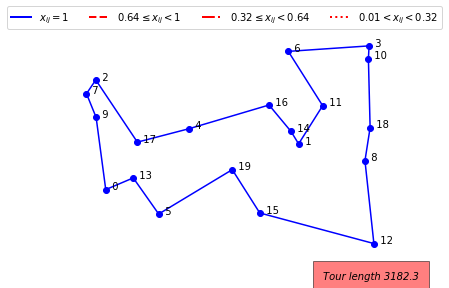

In [4]:
%run src/mtz.py
%matplotlib inline

## Svetska

JA Svestka, "A continuous variable representation of the TSP," Math Prog, v15, 1978, pp 211-213
You find an implementation in the `Material/TSP` repository: [svestka.py](https://github.com/DM872/Material/blob/master/TSP/src/svestka.py). Let's try it on the 20-cities random instance.

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmp2acwidw8.glpk.raw
 --wglp /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpycastghq.glpk.glp
 --cpxlp /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpr6stt309.pyomo.lp
Reading problem data from '/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpr6stt309.pyomo.lp'...
/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpr6stt309.pyomo.lp:3724: warning: lower bound of variable 'x1' redefined
/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpr6stt309.pyomo.lp:3724: warning: upper bound of variable 'x1' redefined
383 rows, 400 columns, 1787 non-zeros
380 integer variables, all of which are binary
4104 lines were read
Writing problem data to '/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpycastghq.glpk.glp'...
3356 lines were written
GLPK Integer Optimizer, v4.65
383 rows, 400 columns, 1787 non-zeros
380 integer variables, all of which are 

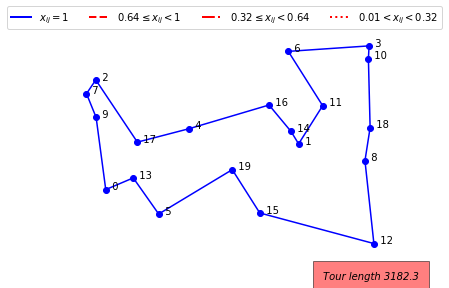

In [6]:
%run src/svestka.py
%matplotlib inline